### **`Importing libraries`**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score

from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install eli5   # for feature importance

     |████████████████████████████████| 112kB 5.4MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **`Loading Data`**

In [ ]:
columns = ['age','sex','chest_pain_type','resting_blood_pressure','cholesterol','fasting_blood_sugar','rest_ecg','max_heart_rate','exercise_induced_angina','ST_depression','slope_exercise','major_vessels_num','thalassemia','target']
dataset = pd.read_csv('/content/drive/My Drive/heart.data', names = columns)
dataset.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,ST_depression,slope_exercise,major_vessels_num,thalassemia,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### **`Cleaning of data`**

In [ ]:
# target variable value
# Displays whether the individual is suffering from heart disease or not.
# 0 = absence
# 1, 2, 3, 4 = present.

dataset["target"].replace({2: 1}, inplace=True)
dataset["target"].replace({3: 1}, inplace=True)
dataset["target"].replace({4: 1}, inplace=True)

In [ ]:
# check for NaN value if any
dataset.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate             0
exercise_induced_angina    0
ST_depression              0
slope_exercise             0
major_vessels_num          0
thalassemia                0
target                     0
dtype: int64

In [ ]:
# Check datatype of features
dataset.dtypes

age                        float64
sex                        float64
chest_pain_type            float64
resting_blood_pressure     float64
cholesterol                float64
fasting_blood_sugar        float64
rest_ecg                   float64
max_heart_rate             float64
exercise_induced_angina    float64
ST_depression              float64
slope_exercise             float64
major_vessels_num           object
thalassemia                 object
target                       int64
dtype: object

In [ ]:
# convert data type of features to appropriate type

dataset['age'] = dataset['age'].astype('int64')
dataset['sex'] = dataset['sex'].astype('int64')
dataset['chest_pain_type'] = dataset['chest_pain_type'].astype('int64')
dataset['fasting_blood_sugar'] = dataset['fasting_blood_sugar'].astype('int64')
dataset['rest_ecg'] = dataset['rest_ecg'].astype('int64')
dataset['exercise_induced_angina'] = dataset['exercise_induced_angina'].astype('int64')
dataset['slope_exercise'] = dataset['slope_exercise'].astype('int64')

In [ ]:
dataset

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,ST_depression,slope_exercise,major_vessels_num,thalassemia,target
0,63,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0.0,6.0,0
1,67,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3.0,3.0,1
2,67,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2.0,7.0,1
3,37,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0.0,3.0,0
4,41,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110.0,264.0,0,0,132.0,0,1.2,2,0.0,7.0,1
299,68,1,4,144.0,193.0,1,0,141.0,0,3.4,2,2.0,7.0,1
300,57,1,4,130.0,131.0,0,0,115.0,1,1.2,2,1.0,7.0,1
301,57,0,2,130.0,236.0,0,2,174.0,0,0.0,2,1.0,3.0,1


In [ ]:
# Checking for '?' value
dataset['thalassemia'].value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thalassemia, dtype: int64

In [ ]:
#Checking for '?' value
dataset['major_vessels_num'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: major_vessels_num, dtype: int64

In [ ]:
# finding rows containing '?' value
dataset.loc[dataset['major_vessels_num'] == '?']

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,ST_depression,slope_exercise,major_vessels_num,thalassemia,target
166,52,1,3,138.0,223.0,0,0,169.0,0,0.0,1,?,3.0,0
192,43,1,4,132.0,247.0,1,2,143.0,1,0.1,2,?,7.0,1
287,58,1,2,125.0,220.0,0,0,144.0,0,0.4,2,?,7.0,0
302,38,1,3,138.0,175.0,0,0,173.0,0,0.0,1,?,3.0,0


In [ ]:
# finding rows containing '?' value
dataset.loc[dataset['thalassemia'] == '?']

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,ST_depression,slope_exercise,major_vessels_num,thalassemia,target
87,53,0,3,128.0,216.0,0,2,115.0,0,0.0,1,0.0,?,0
266,52,1,4,128.0,204.0,1,0,156.0,1,1.0,2,0.0,?,1


In [ ]:
# Replacing '?' with 0
dataset["major_vessels_num"].replace({"?": "0"}, inplace=True)
dataset["thalassemia"].replace({"?": "0"}, inplace=True)

In [ ]:
# Cleaned Data
dataset

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,ST_depression,slope_exercise,major_vessels_num,thalassemia,target
0,63,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0.0,6.0,0
1,67,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3.0,3.0,1
2,67,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2.0,7.0,1
3,37,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0.0,3.0,0
4,41,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110.0,264.0,0,0,132.0,0,1.2,2,0.0,7.0,1
299,68,1,4,144.0,193.0,1,0,141.0,0,3.4,2,2.0,7.0,1
300,57,1,4,130.0,131.0,0,0,115.0,1,1.2,2,1.0,7.0,1
301,57,0,2,130.0,236.0,0,2,174.0,0,0.0,2,1.0,3.0,1


In [ ]:
# copying dataset
new_dataset = dataset.copy()

### **`Visualization`**

In [ ]:

# For visualization purpose



new_dataset['chest_pain_type'][new_dataset['chest_pain_type'] == 1] = 'typical angina'
new_dataset['chest_pain_type'][new_dataset['chest_pain_type'] == 2] = 'atypical angina'
new_dataset['chest_pain_type'][new_dataset['chest_pain_type'] == 3] = 'non-anginal pain'
new_dataset['chest_pain_type'][new_dataset['chest_pain_type'] == 4] = 'asymptomatic'


new_dataset['slope_exercise'][new_dataset['slope_exercise'] == 1] = 'upsloping'
new_dataset['slope_exercise'][new_dataset['slope_exercise'] == 2] = 'flat'
new_dataset['slope_exercise'][new_dataset['slope_exercise'] == 3] = 'downsloping'

new_dataset['thalassemia'][new_dataset['thalassemia'] == '3.0'] = 'normal'
new_dataset['thalassemia'][new_dataset['thalassemia'] == '6.0'] = 'fixed defect'
new_dataset['thalassemia'][new_dataset['thalassemia'] == '7.0'] = 'reversable defect'

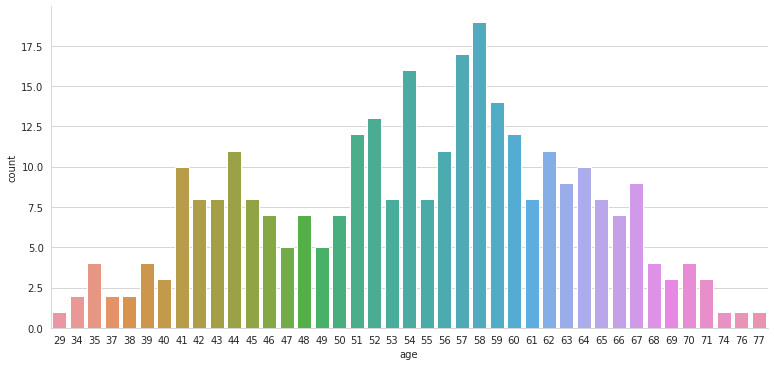

In [ ]:
sns.set_style("whitegrid")


#A count plot displays the number of observations in each category of your variable.
sns.catplot(x='age', data = new_dataset, kind='count',aspect=32/15);

**Observation:** *We observed that people of age 58 are mostly suffering from heart disease; followed by age 57*.

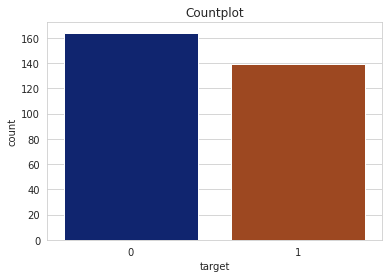

In [ ]:
# Plot to show number of people with heart disease
# 1 indicates people with heart disease
plt.title("Countplot")
sns.countplot(x ='target', data = new_dataset,palette = 'dark');


**Observation**: *Plot to show number of people with heart disease*.

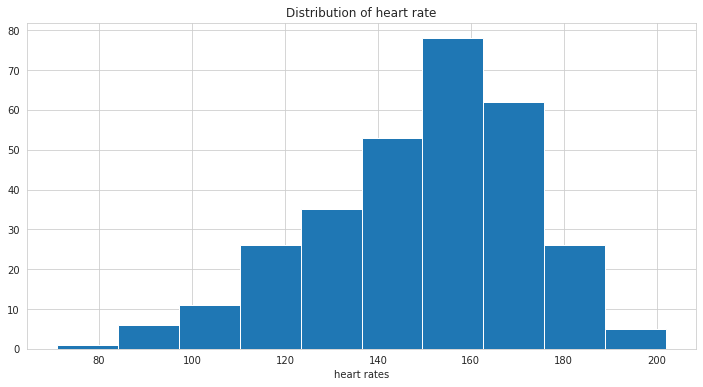

In [ ]:
plt.figure(figsize=(12, 6))
plt.title("Distribution of heart rate")
plt.xlabel('heart rates')
plt.hist(new_dataset.max_heart_rate);

**Observation**: *We observed that heart rates falls in range of 80 - 200*.

### -----------------------  **Models** -------------------------------

In [ ]:
# Train-test split

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


# Normalization
from sklearn.preprocessing import StandardScaler as ss
sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
model_accuracy = {}
from sklearn import metrics

In [ ]:
# Decision tree classifier

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)
CM_Dt = metrics.confusion_matrix(y_test, y_pred)


print()
print('Accuracy for training set for Decision Tree = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Decision Tree = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))
model_accuracy['Decision Tree'] = (cm_test[0][0] + cm_test[1][1])/len(y_test)


Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.7704918032786885


In [ ]:
cm_dt = CM_Dt.astype('float') / CM_Dt.sum(axis=1)[:, np.newaxis]

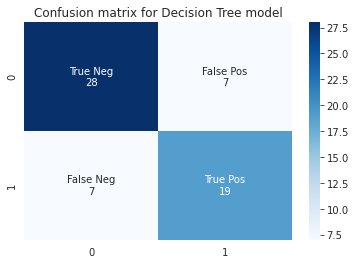

In [ ]:
labels = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in CM_Dt.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(labels,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.title('Confusion matrix for Decision Tree model')
sns.heatmap(CM_Dt, annot=labels, fmt='', cmap='Blues');

In [ ]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)
CM_RF = metrics.confusion_matrix(y_test, y_pred)


print()
print('Accuracy for training set for Random Forest = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Random Forest = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))
model_accuracy['Random Forest'] = (cm_test[0][0] + cm_test[1][1])/len(y_test)


Accuracy for training set for Random Forest = 0.9917355371900827
Accuracy for test set for Random Forest = 0.7540983606557377


In [ ]:
cm_rf = CM_RF.astype('float') / CM_RF.sum(axis=1)[:, np.newaxis]

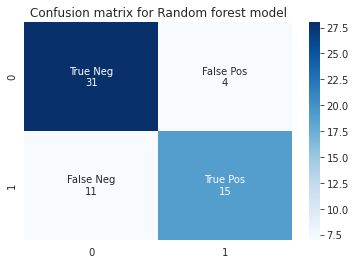

In [ ]:
labels = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in CM_RF.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(labels,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.title('Confusion matrix for Random forest model')
sns.heatmap(CM_Dt, annot=labels, fmt='', cmap='Blues');

In [ ]:
# SVM

from sklearn.svm import SVC
classifier_SVC = SVC(kernel = 'rbf')
classifier_SVC.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_SVC.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier_SVC.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)
CM_SVC = metrics.confusion_matrix(y_test, y_pred)

print()
print('Accuracy for training set for svm = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for svm = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))
model_accuracy['SVM'] = (cm_test[0][0] + cm_test[1][1])/len(y_test)



Accuracy for training set for svm = 0.9256198347107438
Accuracy for test set for svm = 0.8032786885245902


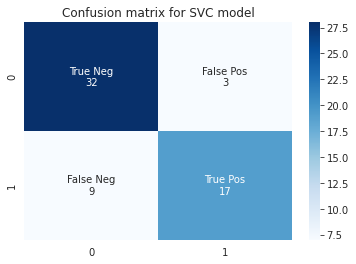

In [ ]:
cm_SVC = CM_SVC.astype('float') / CM_SVC.sum(axis=1)[:, np.newaxis]

labels = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in CM_SVC.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(labels,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.title('Confusion matrix for SVC model')
sns.heatmap(CM_Dt, annot=labels, fmt='', cmap='Blues');

In [ ]:
# MPL model with backpropagation algorithm
count=0
nn = MLPClassifier(activation='logistic',solver='sgd',hidden_layer_sizes=(8),learning_rate='constant',random_state=1)
nn.fit(X_train,y_train)
predicted = nn.predict(X_test)
for i in range(len(predicted)):
  if predicted[i]==y_test[i]:
    count=count+1


CM_MLP = metrics.confusion_matrix(y_test, predicted)
total_test_instance = len(predicted)
print("Testing Accuracy: ",count/total_test_instance)    
model_accuracy['Backpropagation NN'] = count/total_test_instance

Testing Accuracy:  0.7868852459016393


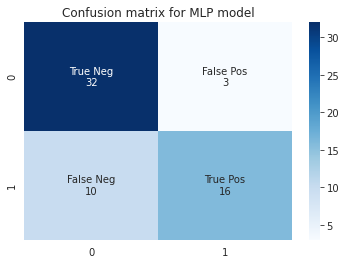

In [ ]:
cm_MLP = CM_MLP.astype('float') / CM_MLP.sum(axis=1)[:, np.newaxis]

labels = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in CM_MLP.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(labels,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.title('Confusion matrix for MLP model')
sns.heatmap(CM_MLP, annot=labels, fmt='', cmap='Blues');

In [ ]:
import eli5 #for permutation importance
from eli5.sklearn import PermutationImportance

cols = ['age','sex','chest_pain_type','resting_blood_pressure','cholesterol','fasting_blood_sugar','rest_ecg','max_heart_rate','exercise_induced_angina','ST_depression','slope_exercise','major_vessels_num','thalassemia']
perm = PermutationImportance(classifier_SVC, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = cols)

Weight,Feature
0.0492 ± 0.0359,thalassemia
0.0426 ± 0.0262,major_vessels_num
0.0328 ± 0.0464,chest_pain_type
0.0197 ± 0.0321,max_heart_rate
0.0131 ± 0.0131,sex
0.0066 ± 0.0393,ST_depression
0.0066 ± 0.0262,cholesterol
0.0066 ± 0.0161,resting_blood_pressure
0.0000 ± 0.0293,fasting_blood_sugar
-0.0066 ± 0.0161,slope_exercise


**Observation**: *We observed that `thalasemmia` is the most important feature*.

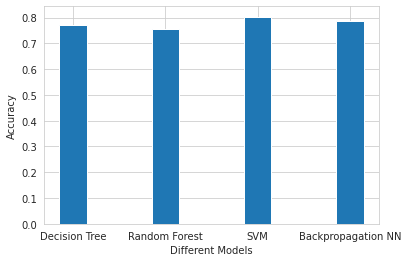

In [ ]:
# To compare the accuracies of all models obtained

plt.bar(*zip(*model_accuracy.items()),width=0.3)
plt.xlabel('Different Models')
plt.ylabel("Accuracy")
plt.show()

**`Highest Accuracy got is from SVM : 80.32 %`**